**Reference**

- https://www.datacamp.com/community/tutorials/lstm-python-stock-market

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv('Stocks/aa.us.txt', usecols=['Date','High', 'Low','Close','Open'])
df = df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,2.2972,2.3178,2.2972,2.2972
1,1970-01-05,2.2972,2.2972,2.2544,2.2759
2,1970-01-06,2.2759,2.2759,2.2342,2.2342
3,1970-01-07,2.2342,2.2342,2.2342,2.2342
4,1970-01-08,2.2342,2.2342,2.2139,2.2139


In [11]:
df.shape

(12074, 5)

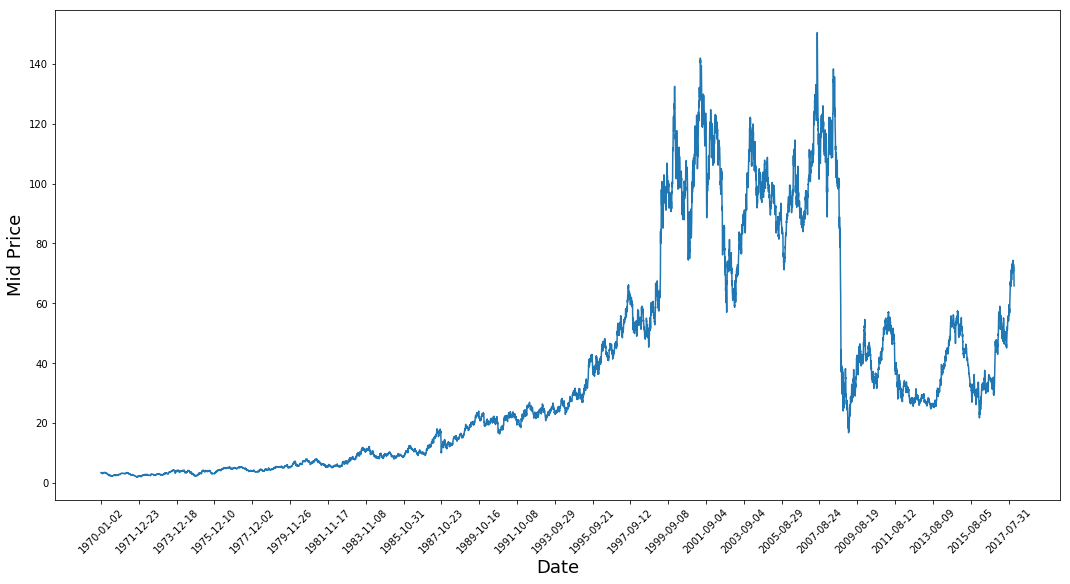

In [13]:
# virtualization
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]), (df['High']+df['Low']/2.0))
plt.xticks(range(0, df.shape[0], 500), df['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

In [22]:
# Split data into training and test dataset
mid_price = ((df['High'] + df['Low']) / 2).values
train_data = mid_price[:11000].reshape(-1,1)
test_data = mid_price[11000:].reshape(-1,1)

**Normalization**

Due to the observation you made earlier, that is, different time periods of data have different value ranges, you normalize the data by splitting the full series into windows. If you don't do this, the earlier data will be close to 0 and will not add much value to the learning process. Here you choose a window size of 2500.

Tip: when choosing the window size make sure it's not too small, because when you perform windowed-normalization, it can introduce a break at the very end of each window, as each window is normalized independently.

In this example, 4 data points will be affected by this. But given you have 11,000 data points, 4 points will not cause any issue.

In [23]:
scalar = MinMaxScaler()
smoothing_window_size = 2500
for di in range(0, 10000, smoothing_window_size):
    scalar.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scalar.transform(train_data[di:di+smoothing_window_size,:])
    
# the last
scalar.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scalar.transform(train_data[di+smoothing_window_size:,:])

In [24]:
# reshape both train and test data
train_data = train_data.reshape(-1)

# normalize test data
test_data = scalar.transform(test_data).reshape(-1)

In [25]:
# smooth data with EMA(exponential moving average)
EMA = 0.0
alpha = 0.1
for ti in range(11000):
    EMA = alpha*train_data[ti] + (1-alpha)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data, test_data], axis=0)

In [ ]:
# Standard Average
